In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os

In [2]:
def load_data(file_path):
    file_extension = file_path.split('.')[-1]
    
    if file_extension == "csv":
        return pd.read_csv(file_path)
    elif file_extension == "xlsx":
        return pd.read_excel(file_path)

In [3]:
def preprocess_data(data):
    data_types = data.dtypes
    # Handle missing values
    data = data.dropna()
    # Encode categorical features
    data = pd.get_dummies(data, columns=data.select_dtypes(include=['object']).columns)
    # Scale numerical features
    scaler = StandardScaler()
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
    return data

In [4]:
def visualize_data(data):
    for column in data.columns:
        if data[column].dtype in ['float64', 'int64']:
            plt.figure(figsize=(12, 4))
            
            # Histogram
            plt.subplot(1, 5, 1)
            plt.hist(data[column], bins=20)
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.title(f'Histogram of {column}')
            
            # Scatter Plot
            plt.subplot(1, 5, 2)
            sns.scatterplot(data=data, x=column, y=data.columns[-1])
            plt.xlabel(column)
            plt.ylabel(data.columns[-1])
            plt.title(f'Scatter Plot: {column} vs {data.columns[-1]}')
            
            # Box Plot
            plt.subplot(1, 5, 3)
            sns.boxplot(data=data, y=column)
            plt.ylabel(column)
            plt.title(f'Box Plot of {column}')
            
            # Pie Chart for categorical columns
            if len(data[column].unique()) <= 10:  # Only create pie chart for columns with <= 10 unique values
                plt.figure(figsize=(6, 4))
                value_counts = data[column].value_counts()
                plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
                plt.axis('equal')
                plt.title(f'Pie Chart of {column}')
                plt.show()
            
            # Bar Plot for categorical columns
            if len(data[column].unique()) <= 10:  # Only create bar plot for columns with <= 10 unique values
                plt.subplot(1, 5, 5)
                value_counts = data[column].value_counts()
                plt.bar(value_counts.index, value_counts.values)
                plt.xlabel(column)
                plt.ylabel('Frequency')
                plt.title(f'Bar Plot of {column}')
            
            plt.tight_layout()
            plt.show()

path_to_your_dataset.file_extensionD:\elctro pi\Capstone Automated EDA\International_Report_Passengers.csv


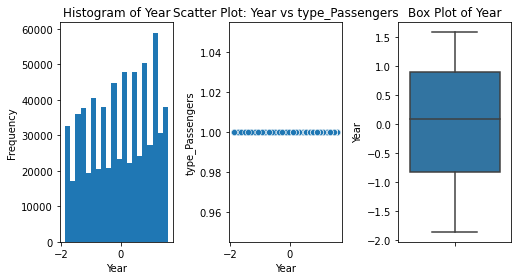

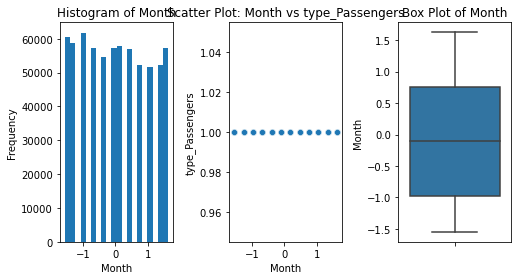

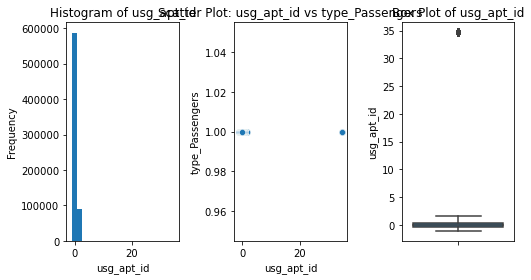

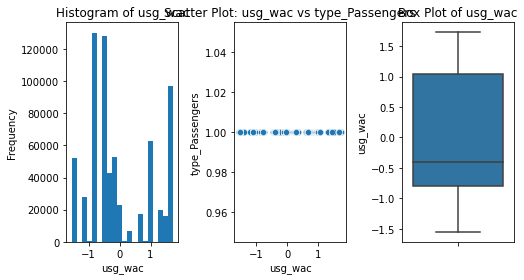

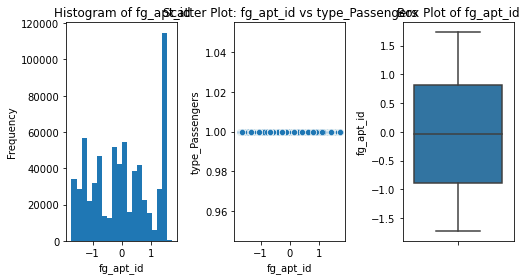

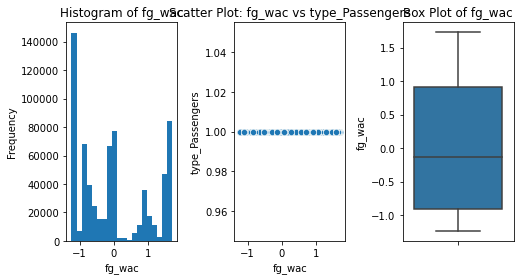

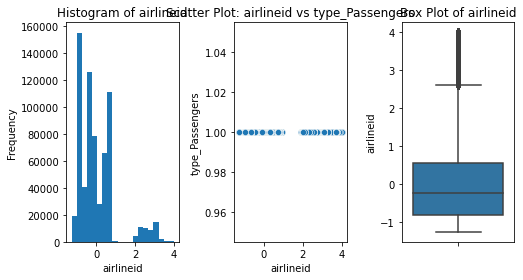

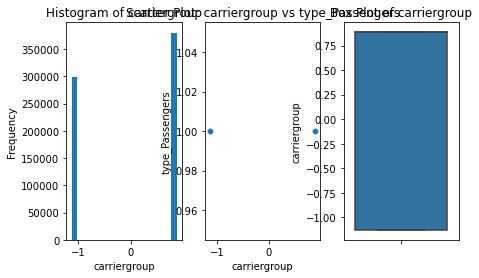

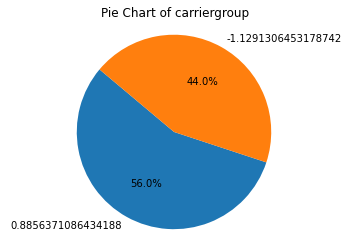

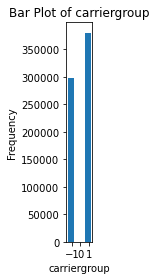

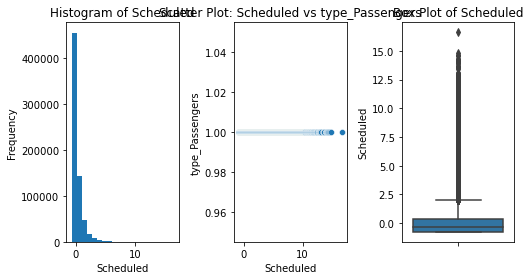

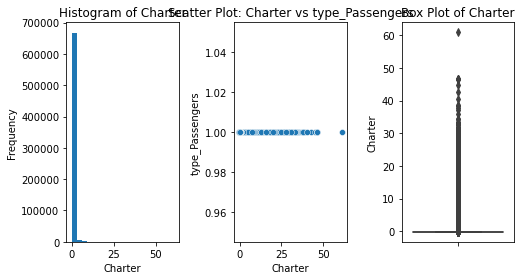

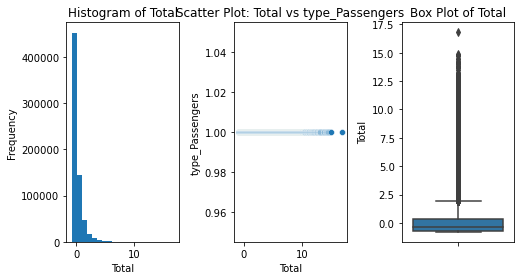

In [5]:
if __name__ == "__main__":
    file_path = input("path_to_your_dataset.file_extension")
    data = load_data(file_path)
    preprocessed_data = preprocess_data(data)
    visualize_data(preprocessed_data)